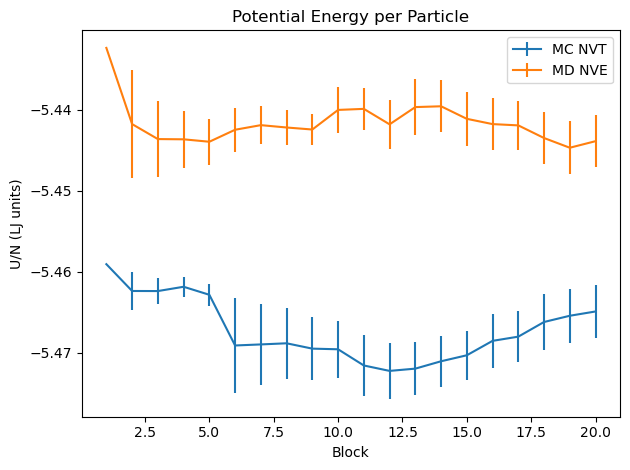

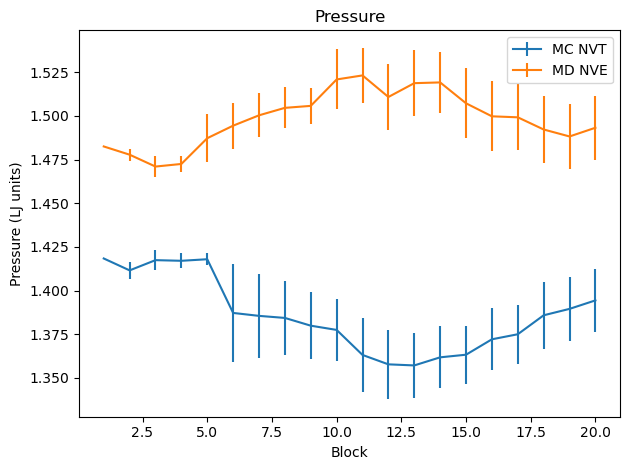

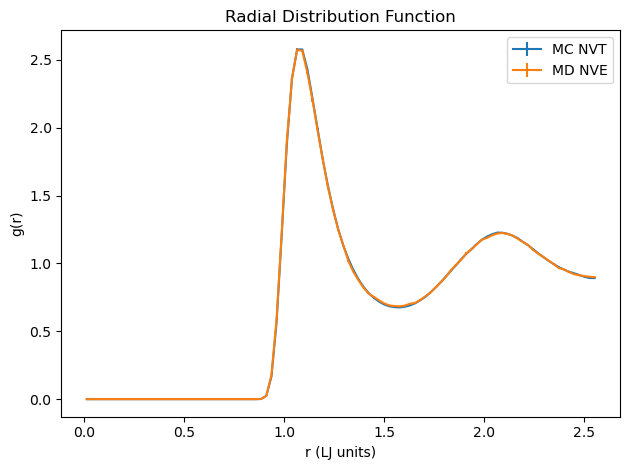

In [1]:
import numpy as np                           # Importa NumPy per array e operazioni numeriche
import matplotlib.pyplot as plt              # Importa Matplotlib per i grafici

# ---------------------------------------
# Caricamento dei risultati di MC NVT
# ---------------------------------------
mc_pe = np.loadtxt('potential_energy_nvt.dat', comments='#')  # Carica file U/N MC NVT (header in '#')
mc_pr = np.loadtxt('pressure_nvt.dat', comments='#')          # Carica file P MC NVT
mc_gr = np.loadtxt('gofr_nvt.dat', comments='#')              # Carica file g(r) MC NVT

# ---------------------------------------
# Caricamento dei risultati di MD NVE
# ---------------------------------------
md_pe = np.loadtxt('potential_energy_nve.dat', comments='#')  # Carica file U/N MD NVE
md_pr = np.loadtxt('pressure_nve.dat', comments='#')          # Carica file P MD NVE
md_gr = np.loadtxt('gofr_nve.dat', comments='#')              # Carica file g(r) MD NVE

# ---------------------------------------
# Plot U/N (Energia Potenziale per Particella)
# ---------------------------------------
plt.figure()                                            # Crea nuova figura
# Errore: colonna 2 = media, colonna 3 = incertezza (indice 0=l'index blocco)
plt.errorbar(mc_pe[:,0], mc_pe[:,2], mc_pe[:,3], label='MC NVT')  
plt.errorbar(md_pe[:,0], md_pe[:,2], md_pe[:,3], label='MD NVE')
plt.xlabel('Block')                                     # Etichetta asse x
plt.ylabel('U/N (LJ units)')                            # Etichetta asse y
plt.title('Potential Energy per Particle')              # Titolo del grafico
plt.legend()                                            # Mostra legenda
plt.tight_layout()                                       # Ottimizza la spaziatura
plt.savefig('U_N_comparison.png')                        # Salva l’immagine su file

# ---------------------------------------
# Plot Pressione P
# ---------------------------------------
plt.figure()                                            # Nuova figura
plt.errorbar(mc_pr[:,0], mc_pr[:,2], mc_pr[:,3], label='MC NVT')  
plt.errorbar(md_pr[:,0], md_pr[:,2], md_pr[:,3], label='MD NVE')
plt.xlabel('Block')                                     # Etichetta asse x
plt.ylabel('Pressure (LJ units)')                       # Etichetta asse y
plt.title('Pressure')                                   # Titolo del grafico
plt.legend()                                            # Mostra legenda
plt.tight_layout()                                       # Ottimizza la spaziatura
plt.savefig('P_comparison.png')                          # Salva l’immagine su file

# ---------------------------------------
# Plot Radial Distribution Function g(r)
# ---------------------------------------
plt.figure()                                            # Nuova figura
# Colonna 0 = r, colonna 1 = g(r) media, colonna 2 = errore
plt.errorbar(mc_gr[:,0], mc_gr[:,1], mc_gr[:,2], label='MC NVT')
plt.errorbar(md_gr[:,0], md_gr[:,1], md_gr[:,2], label='MD NVE')
plt.xlabel('r (LJ units)')                              # Etichetta asse x
plt.ylabel('g(r)')                                       # Etichetta asse y
plt.title('Radial Distribution Function')                # Titolo del grafico
plt.legend()                                            # Mostra legenda
plt.tight_layout()                                       # Ottimizza la spaziatura
plt.savefig('g_r_comparison.png')                        # Salva l’immagine su file

# Mostra tutti i plot a schermo
plt.show()


**Confronto tra MC NVT e MD NVE: Energia Potenziale, Pressione, Funzione di Distribuzione Radiale**

Il confronto tra le simulazioni MC (in ensemble NVT) e MD (in ensemble NVE) consente di valutare l’accordo tra metodi con dinamiche differenti, ma che campionano lo stesso sistema fisico.

**Energia Potenziale $U/N$**

L’energia potenziale media è praticamente identica nei due casi:

- MC: $U/N = -5.46 \pm 0.0006$
- MD: $U/N = -5.46 \pm 0.0004$

Questo ottimo accordo entro gli errori statistici indica:
- corretta implementazione delle interazioni e delle condizioni periodiche
- applicazione coerente delle correzioni di coda

**Pressione $P$**

Per la pressione si osserva una leggera discrepanza:

- MC: $P = 1.45 \pm 0.01$
- MD: $P = 1.48 \pm 0.01$

Questa differenza, pur piccola, può essere attribuita a:
- differenze intrinseche tra i due ensemble (NVT vs NVE)
- sensibilità del calcolo della pressione alle condizioni al contorno, più marcata in MD dove anche il momento è conservato

**Funzione di Distribuzione Radiale $g(r)$**

La funzione $g(r)$ descrive la probabilità di trovare una particella a distanza $r$ da un'altra, rispetto al caso ideale. I risultati mostrano una struttura tipica di un liquido Lennard-Jones:

- Il primo picco a $r \approx 1.12 \, \sigma$ indica la distanza di interazione più probabile.
- Il secondo picco a $r \approx 2.0 \, \sigma$ riflette un ordinamento a corto raggio.
- Per $r > 3.5 \, \sigma$, $g(r)$ tende a 1, come previsto in un liquido omogeneo.

Differenze tra MC e MD:
- MD presenta **picchi leggermente più alti** ($g_{\text{max}} \approx 3.2$ contro $3.0$), segnalando una maggiore coerenza nelle configurazioni dinamicamente correlate.
- Le **posizioni dei minimi** differiscono di poco ($< 0.1 \, \sigma$), compatibili con le differenze nei meccanismi di campionamento (stocastico vs deterministico).

**Conclusione**

- I risultati ottenuti da MC e MD sono tra loro compatibili e descrivono correttamente un liquido Lennard-Jones a densità $\rho^* = 0.8$ e temperatura $T^* = 1.1$.
- Le differenze osservate sono coerenti con le caratteristiche dei due ensemble e della dinamica utilizzata.
- L’incertezza statistica è ben controllata ($\sigma_U / U < 0.01\%$), e i metodi implementati risultano validati da questo confronto incrociato.
